In [1]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Lambda, Flatten, Dense, Dropout, Layer, Activation
from keras.layers import Conv2D, MaxPooling2D
import cv2
import os
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam
import h5py
import random
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


1 7 14
This image is: <class 'numpy.ndarray'> with dimensions: (131, 51, 3)


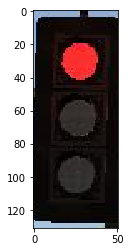

In [2]:
#reading in an image
image = cv2.imread('./img/red/image0.png')
print(image[10][10][0], image[10][10][1], image[10][10][2])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [3]:
print(image[10][10][0], image[10][10][1], image[10][10][2])

14 7 1


In [4]:
resized_image = cv2.resize(image, (30, 90)) 

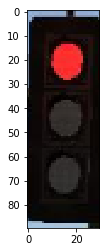

In [5]:
plt.imshow(resized_image)

In [6]:
print('This image is:', type(resized_image), 'with dimensions:', resized_image.shape)

This image is: <class 'numpy.ndarray'> with dimensions: (90, 30, 3)


In [7]:
import glob
from random import shuffle

data = []

images = glob.glob('./img/red/*.png')
for fname in images:
    img = cv2.imread(fname)
    img = cv2.resize(img, (30, 90))
    data.append([img, 0])

images = glob.glob('./img/yellow/*.png')
for fname in images:
    img = cv2.imread(fname)
    img = cv2.resize(img, (30, 90))
    data.append([img, 1])

images = glob.glob('./img/green/*.png')
for fname in images:
    img = cv2.imread(fname)
    img = cv2.resize(img, (30, 90))
    data.append([img, 2])

images = glob.glob('./img/unknown/*.png')
for fname in images:
    img = cv2.imread(fname)
    img = cv2.resize(img, (30, 90))
    data.append([img, 3])

shuffle(data)


2 (90, 30, 3)


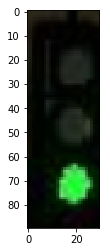

In [8]:
test = cv2.cvtColor(data[251][0], cv2.COLOR_BGR2RGB)
plt.imshow(test)
print(data[251][1], data[251][0].shape)

In [9]:
from sklearn.model_selection import train_test_split
shuffle(data)
train_samples, validation_samples = train_test_split(data, test_size=0.20)
validation_samples, test_samples = train_test_split(validation_samples, test_size=0.3)

2 (90, 30, 3)


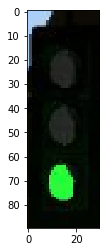

In [10]:
test = cv2.cvtColor(train_samples[251][0], cv2.COLOR_BGR2RGB)
plt.imshow(test)
print(train_samples[251][1], train_samples[251][0].shape)

In [11]:
def createModel():
    model = Sequential()
    model.add(Layer(input_shape=(90,30,3)))
    model.add(Lambda(lambda x: (x / 255.0) - 0.5) )

    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('softmax'))
 
    return model

In [12]:
model = createModel()
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Layer)              (None, 90, 30, 3)         0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 90, 30, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 15, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 7, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 7, 16)         0         
__________

In [14]:
x_ = []
y_ = []
for i in data:
    x_.append(i[0])
    y_.append(i[1])
x_ = np.array(x_)
y_ = np.array(y_)

X_train, x_validation, y_train, y_validation = train_test_split(x_, y_, train_size = 0.85, test_size = 0.015)

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

In [16]:
print(len(data), len(X_train))

605 514


In [17]:
print(X_train.shape)

(514, 90, 30, 3)


In [18]:
history = model.fit(X_train, y_one_hot, epochs=30, validation_split=0.1)

Train on 462 samples, validate on 52 samples
Epoch 1/30
462/462 [==============================] - 1s - loss: 1.1844 - acc: 0.4935 - val_loss: 0.9503 - val_acc: 0.7500
Epoch 2/30
462/462 [==============================] - 0s - loss: 0.6592 - acc: 0.7468 - val_loss: 0.2674 - val_acc: 0.9038
Epoch 3/30
462/462 [==============================] - 0s - loss: 0.2284 - acc: 0.9242 - val_loss: 0.1167 - val_acc: 0.9808
Epoch 4/30
462/462 [==============================] - 0s - loss: 0.1615 - acc: 0.9394 - val_loss: 0.0824 - val_acc: 0.9808
Epoch 5/30
462/462 [==============================] - 0s - loss: 0.0785 - acc: 0.9805 - val_loss: 0.0489 - val_acc: 0.9808
Epoch 6/30
462/462 [==============================] - 0s - loss: 0.0326 - acc: 0.9935 - val_loss: 0.0367 - val_acc: 0.9808
Epoch 7/30
462/462 [==============================] - 1s - loss: 0.0522 - acc: 0.9827 - val_loss: 0.0432 - val_acc: 0.9808
Epoch 8/30
462/462 [==============================] - 1s - loss: 0.0446 - acc: 0.9805 - val_lo

In [19]:
model.save('model.h5')

In [20]:
y_one_hot2 = label_binarizer.fit_transform(y_validation)
model.evaluate(x_validation, y_one_hot2)

10/10 [==============================] - 0s


[3.6954912729925127e-07, 1.0]

In [35]:
def testNetwork(path):
    testimage = cv2.imread(path)
    print(testimage.shape)
    image2 = cv2.cvtColor(testimage, cv2.COLOR_BGR2RGB)

    print('This image is:', type(image2), 'with dimensions:', image.shape)
    plt.imshow(image2)
    testimage = cv2.resize(testimage, (30, 90))
    predicted = model.predict(testimage[None, :, :, :], batch_size=1)[0]
    idxs = np.argsort(predicted)[::-1][0]
    print(predicted, idxs)

(202, 96, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (154, 48, 3)
[  2.28572496e-37   4.80087320e-38   1.00000000e+00   1.46458164e-21] 2


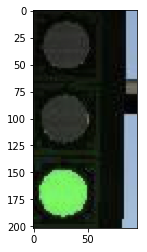

In [39]:
testNetwork('./img/testimg/green1.png')

(256, 116, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (154, 48, 3)
[  8.31732395e-28   1.11878282e-27   1.00000000e+00   1.15732348e-16] 2


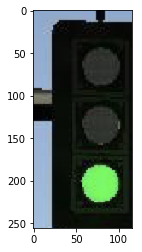

In [40]:
testNetwork('./img/testimg/green2.png')

(274, 104, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (154, 48, 3)
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   2.29625663e-29] 0


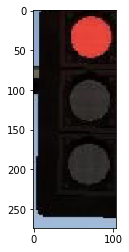

In [41]:
testNetwork('./img/testimg/red1.png')

(286, 86, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (154, 48, 3)
[  1.00000000e+00   3.39137732e-32   0.00000000e+00   3.53624295e-31] 0


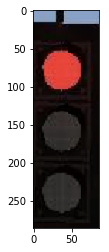

In [42]:
testNetwork('./img/testimg/red2.png')

(254, 108, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (154, 48, 3)
[  4.70552258e-37   1.00000000e+00   1.11655047e-24   4.79470289e-24] 1


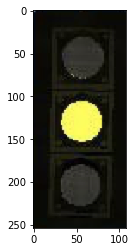

In [44]:
testNetwork('./img/testimg/yellow1.png')

(276, 98, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (154, 48, 3)
[  2.36702195e-04   1.69671403e-04   1.60569660e-04   9.99433100e-01] 3


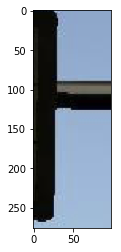

In [45]:
testNetwork('./img/testimg/unknown.png')